<a href="https://colab.research.google.com/github/cbonnin88/Soundstream/blob/main/Churn_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import gdown as gd
import plotly.graph_objects as go

In [ ]:
url = "https://drive.google.com/uc?id=1mT1mvIkEliFfRP4JPC7dTjrdy412zs1x"
gd.download(url,"Soundstream_user_data.csv",quiet=True)

df_userdata = pd.read_csv('Soundstream_user_data.csv')
df_userdata.head(10)

,user_id,signup_date,action,timestamp,subscription_type,device,monthly_revenue
0,user_635,2024-05-19,upgrade_premium,2024-12-11 9:44:07,premium,mobile,10
1,user_343,2024-05-07,like_song,2024-10-26 21:53:35,free,mobile,0
2,user_185,2024-05-24,like_song,2024-11-17 22:32:06,premium,desktop,10
3,user_613,2024-05-16,logout,2024-11-02 11:43:13,premium,mobile,10
4,user_407,2024-05-20,create_playlist,2024-08-24 8:56:55,premium,mobile,10
5,user_787,2024-05-25,create_playlist,2024-08-31 1:21:19,premium,mobile,10
6,user_161,2024-05-28,upgrade_premium,2024-10-02 15:49:51,premium,desktop,10
7,user_33,2024-05-22,stream_song,2024-09-17 21:22:07,premium,desktop,10
8,user_878,2024-05-04,like_song,2024-11-13 15:40:41,free,mobile,0
9,user_209,2024-05-27,stream_song,2024-12-21 11:00:06,free,desktop,0


# **Identify churned users who have been inactive for 30+ days**

In [ ]:
# Last Activity Date
df_userdata['timestamp'] = pd.to_datetime(df_userdata['timestamp'])

last_activity = df_userdata.groupby('user_id')['timestamp'].max().reset_index()
last_activity['days_inactive']= (pd.Timestamp('2025-01-01') - last_activity['timestamp']).dt.days

In [ ]:
churned_users = last_activity[last_activity['days_inactive']> 30]
print("Churned Users:")
print(churned_users)

Churned Users:
       user_id           timestamp  days_inactive
2     user_100 2024-11-05 16:48:44             56
3    user_1000 2024-11-28 18:45:04             33
8     user_105 2024-09-18 08:37:01            104
12    user_109 2024-11-14 20:49:15             47
18    user_114 2024-11-20 20:11:08             41
..         ...                 ...            ...
968   user_970 2024-11-24 03:51:50             37
986   user_987 2024-11-05 14:55:10             56
992   user_992 2024-10-21 18:34:31             71
994   user_994 2024-11-27 16:14:21             34
998   user_998 2024-10-15 07:49:44             77

[239 rows x 3 columns]


# **Active vs Churned Users - Bar Plot**

In [ ]:
# Adding a 'churned' column to categorize users
last_activity['status']=last_activity['days_inactive'].apply(lambda x:'Churned' if x > 30 else 'Active')
print(last_activity['status'].value_counts())

status
Active     761
Churned    239
Name: count, dtype: int64


In [ ]:
# Counting users by status
status_counts = last_activity['status'].value_counts().reset_index()
status_counts.columns=['Status', 'Count']

print(status_counts)

    Status  Count
0   Active    761
1  Churned    239


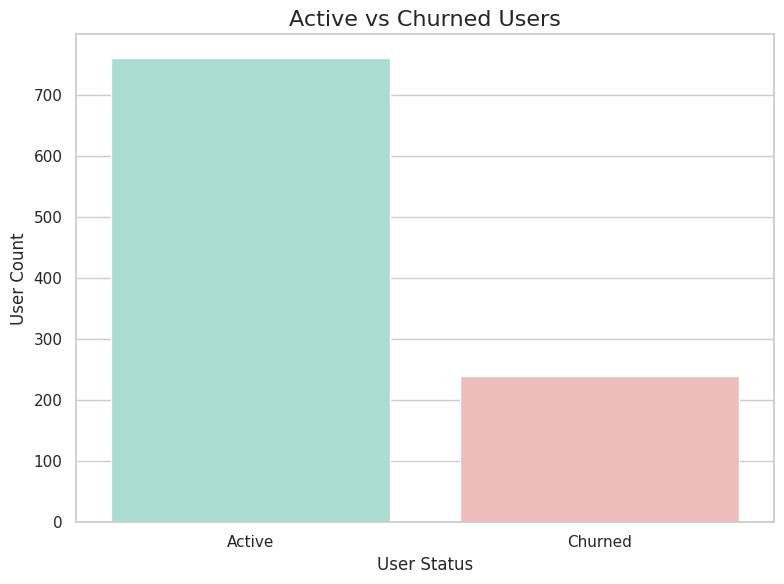

In [ ]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(8,6))

custom_palette = ['#A3E4D7', '#F5B7B1']

sns.barplot(
    data=status_counts,
    x='Status',
    y='Count',
    hue='Status',
    palette=custom_palette
)

plt.title('Active vs Churned Users', fontsize=16)
plt.xlabel('User Status', fontsize=12)
plt.ylabel('User Count', fontsize=12)
plt.tight_layout()

plt.show()

# **Inactive Days**

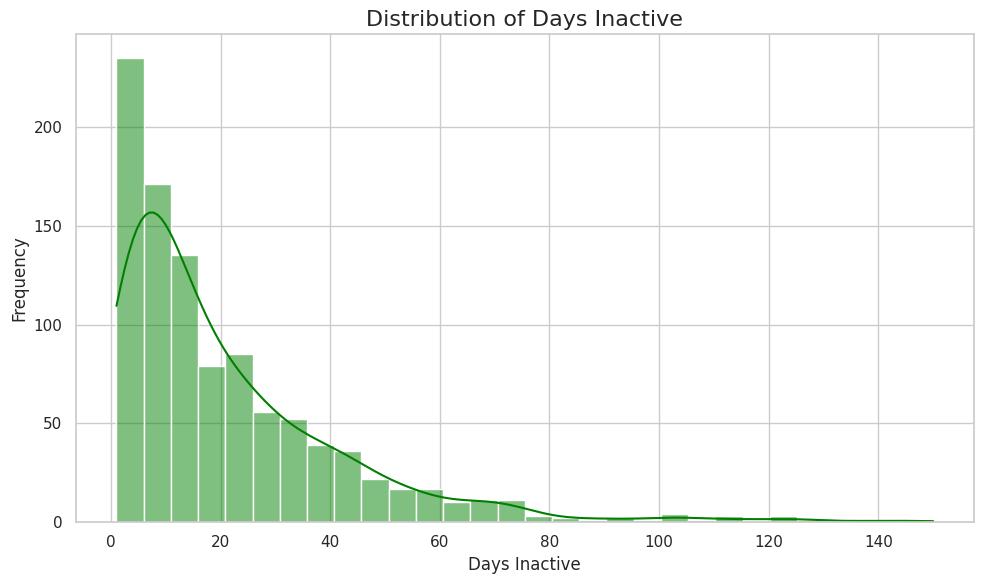

In [ ]:
plt.figure(figsize=(10,6))

sns.histplot(last_activity['days_inactive'],
           bins=30,
           kde=True,
           color='green'
             )


plt.title('Distribution of Days Inactive', fontsize=16)
plt.xlabel('Days Inactive', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()

plt.show()

# **Churn by Subscription Type**

In [ ]:
# Merge with subscription type data
merged_data = pd.merge(last_activity,df_userdata[['user_id','subscription_type']].drop_duplicates(), on='user_id')

In [ ]:
# Count by subscription type and status
status_subscription = merged_data.groupby(['subscription_type','status']).size().reset_index(name='count')

In [ ]:
# Pivot for stacked bar plot
status_subscription_pivot = status_subscription.pivot(index='subscription_type',columns='status', values='count')

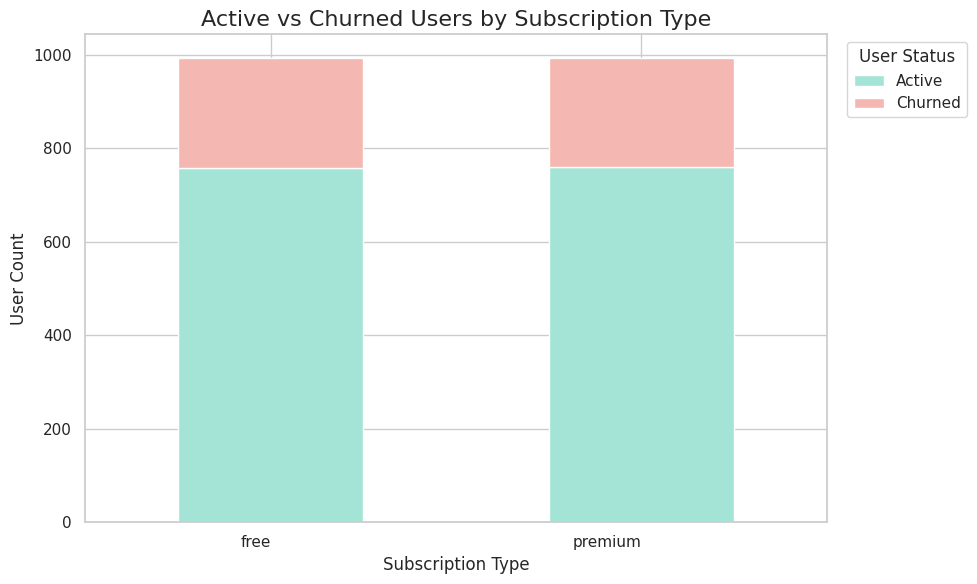

In [ ]:
status_subscription_pivot.plot(
    kind='bar',
    stacked=True,
    figsize=(10,6),
    color=['#A3E4D7', '#F5B7B1']
)

plt.title('Active vs Churned Users by Subscription Type', fontsize=16)
plt.xlabel('Subscription Type', fontsize=12)
plt.ylabel('User Count', fontsize=12)
plt.legend(title='User Status', loc='upper right', bbox_to_anchor=(1.2,1))
plt.xticks(rotation=0, ha='right')
plt.tight_layout()

plt.show()